In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
home_data = pd.read_csv(r'C:\My data\Machine Learning\2_Unsupervised_Learning\Clustering\KMean\housing.csv', usecols=['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

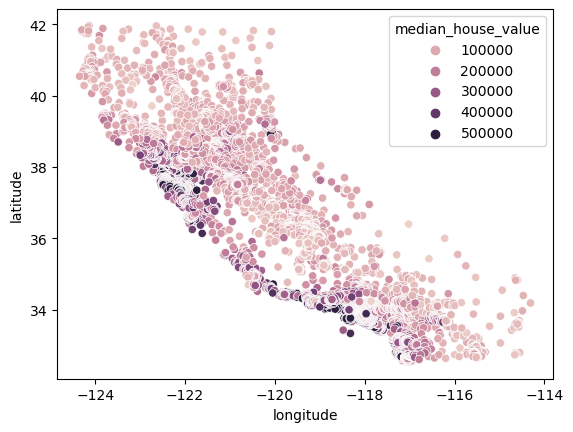

In [4]:
# Visualize the Data

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [6]:
# Normalizing the Data

from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [7]:
# Fitting and Evaluating the Model

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

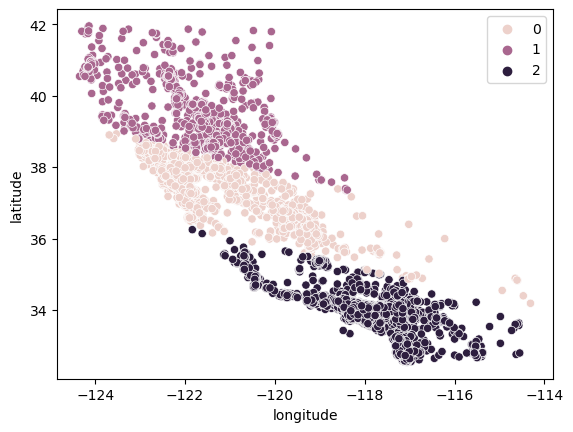

In [8]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

In [10]:
# Reset the index of y_train to align with X_train

y_train_aligned = y_train.reset_index(drop=True)

<Axes: ylabel='median_house_value'>

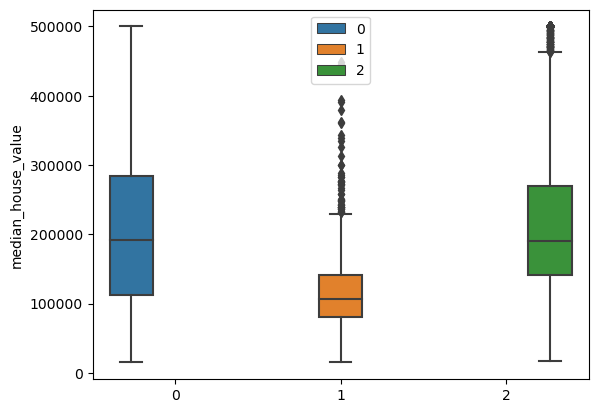

In [12]:
# Ploting The Results

sns.boxplot(x=kmeans.labels_, y=y_train_aligned['median_house_value'], hue=kmeans.labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

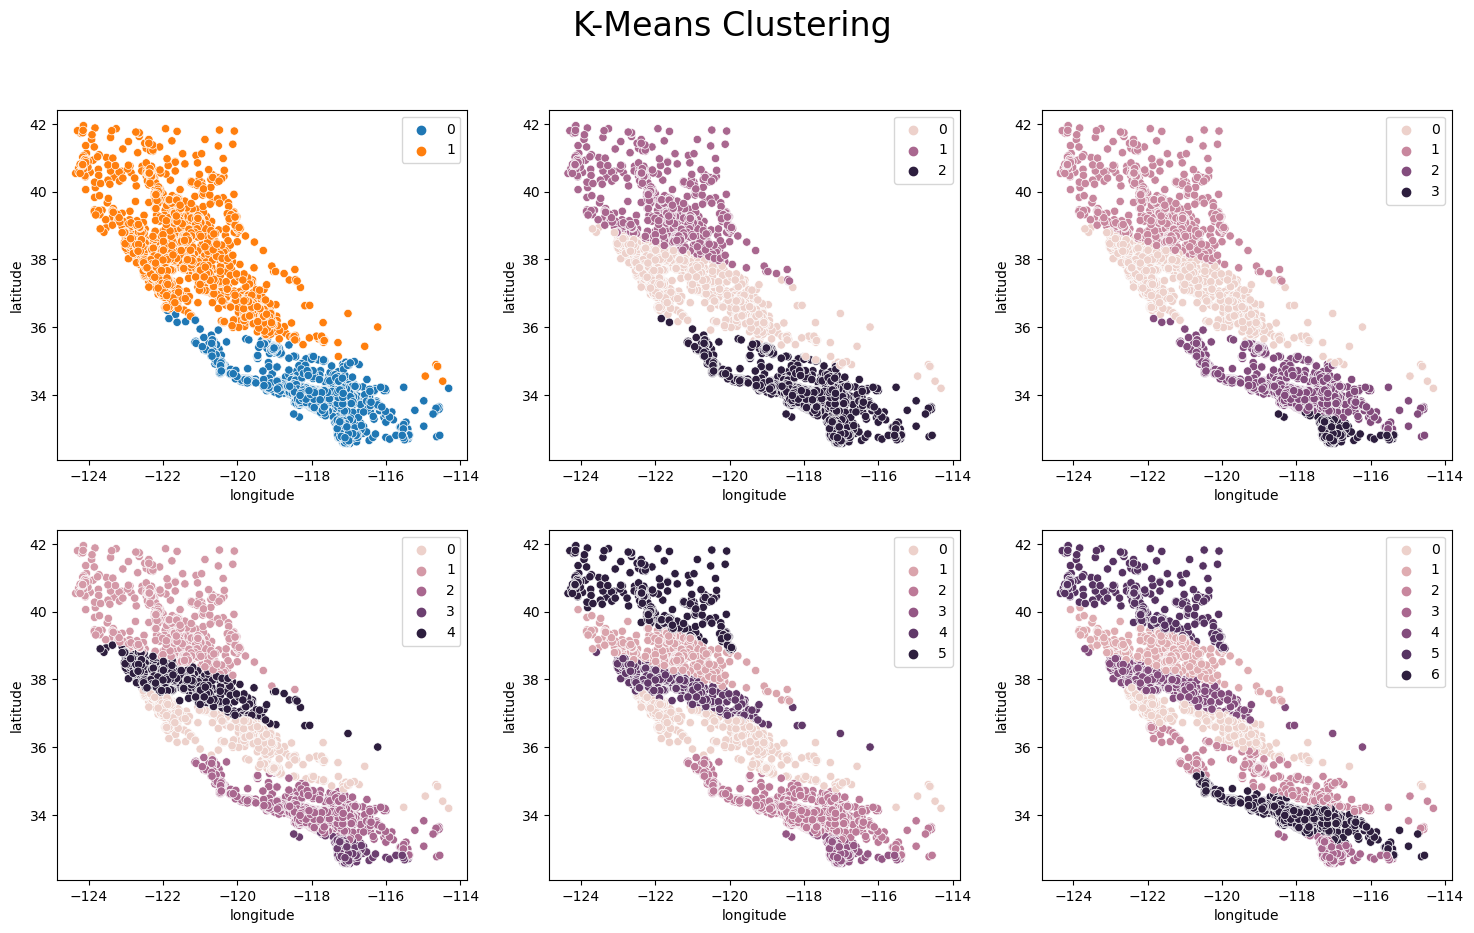

In [13]:
# Choosing the best number of clusters

K = range(2, 8)
fits = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

f, axes = plt.subplots(2, 3, figsize=(18, 10))
f.suptitle('K-Means Clustering', fontsize=24)
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_, ax=axes[0,0])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[1].labels_, ax=axes[0,1])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_, ax=axes[0,2])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_, ax=axes[1,0])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[4].labels_, ax=axes[1,1])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_, ax=axes[1,2])

In [14]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=5, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

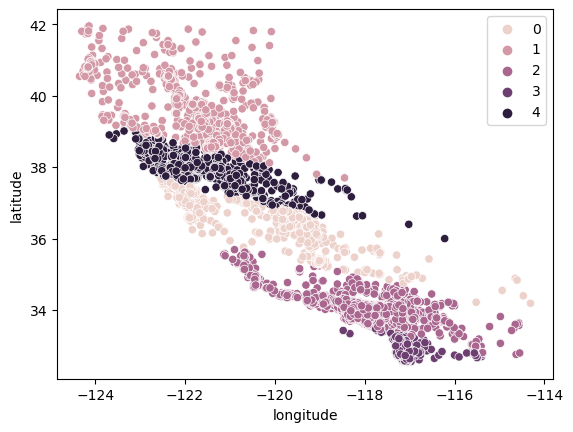

In [15]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

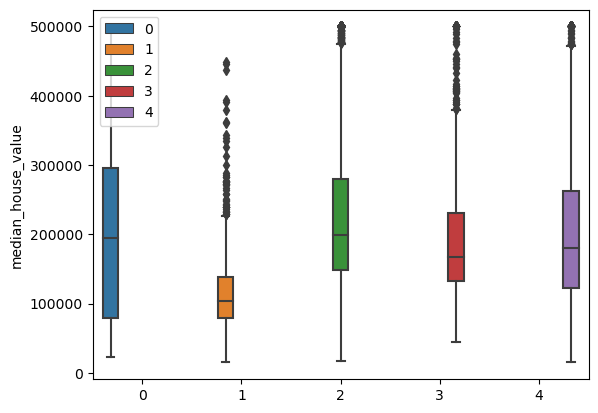

In [17]:
sns.boxplot(x=kmeans.labels_, y=y_train_aligned['median_house_value'], hue=kmeans.labels_)